## Clustering Hierárquico com SciPy

In [16]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline

In [2]:
dados = {'AQL':[1,1,1,0,1,1,1,0,1],
         'Clientes':[1,1,0,1,1,1,1,0,0], 
         'Assinatura':[0,1,0,0,1,0,0,0,0], 
         'Asia':[1,1,1,0,0,0,1,0,0], 
         'America':[0,0,0,0,0,0,0,1,0], 
         'Europa':[0,0,0,1,1,0,0,0,1]}

In [3]:
df = DataFrame(dados, index = ['AP1','AP2','AP3','AP4', 'AP5', 'AP6', 'AP7', 'AP8', 'AP9'])



In [4]:
df.head()

,AQL,America,Asia,Assinatura,Clientes,Europa
AP1,1,0,1,0,1,0
AP2,1,0,1,1,1,0
AP3,1,0,1,0,0,0
AP4,0,0,0,0,1,1
AP5,1,0,0,1,1,1


In [5]:
df.values

array([[1, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1]], dtype=int64)

## Criando a Linkage Matrix

In [6]:
# As distâncias ('metric') estão aqui: http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.pdist.html
# Encontra-se tanto para categórico/binario, quanto contínuo e misto

linkage_matrix_single = sp.cluster.hierarchy.linkage(df, method='single', metric='matching') 
linkage_matrix_complete = sp.cluster.hierarchy.linkage(df, method='complete', metric='matching') 
linkage_matrix_average = sp.cluster.hierarchy.linkage(df, method='average', metric='matching') 
linkage_matrix_weighted = sp.cluster.hierarchy.linkage(df, method='weighted', metric='matching') 
linkage_matrix_centroid = sp.cluster.hierarchy.linkage(df, method='centroid', metric='euclidean') 
linkage_matrix_median = sp.cluster.hierarchy.linkage(df, method='median', metric='euclidean')

# a função linkage faz clustering aglomerativo
# method é o método que ele usa pra fazer a linkage: single (menor distância), complete (maior distância)
# metric é método de cálculo (euclidiano, etc)
# IMPORTANTE: Median = WPGMC = GOWER 


print("Single")
print(linkage_matrix_single)
print("Complete")
print(linkage_matrix_complete)  
print("Average")
print(linkage_matrix_average)
print("Weighted")
print(linkage_matrix_weighted)
print("Centroid")
print(linkage_matrix_centroid)
print("Median")
print(linkage_matrix_median)



Single
[[  0.           6.           0.           2.        ]
 [  1.           9.           0.16666667   3.        ]
 [  2.          10.           0.16666667   4.        ]
 [  5.          11.           0.16666667   5.        ]
 [  3.           8.           0.33333333   2.        ]
 [  4.          13.           0.33333333   3.        ]
 [ 12.          14.           0.33333333   8.        ]
 [  7.          15.           0.5          9.        ]]
Complete
[[  0.           6.           0.           2.        ]
 [  1.           9.           0.16666667   3.        ]
 [  2.           5.           0.33333333   2.        ]
 [  3.           4.           0.33333333   2.        ]
 [  8.          12.           0.33333333   3.        ]
 [ 10.          11.           0.33333333   5.        ]
 [ 13.          14.           0.66666667   8.        ]
 [  7.          15.           0.83333333   9.        ]]
Average
[[  0.           6.           0.           2.        ]
 [  1.           9.           0.1666666

## Dendrograma

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram

labels = ['AP1','AP2','AP3','AP4', 'AP5', 'AP6', 'AP7', 'AP8', 'AP9']

dendrogram = dendrogram(linkage_matrix_complete, truncate_mode='none', orientation = "top", labels = labels)

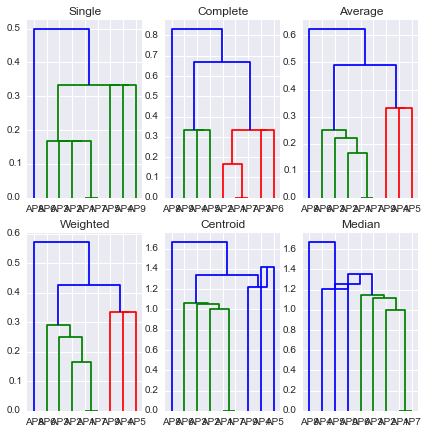

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram

f, axes = plt.subplots(2, 3, figsize=(7, 7), sharex=False, sharey=False)
b, g, r = sns.color_palette("muted", 3)


dendrogram(linkage_matrix_single, truncate_mode='none', orientation = "top", labels = labels, ax = axes[0,0])
dendrogram(linkage_matrix_complete, truncate_mode='none', orientation = "top", labels = labels, ax = axes[0,1])
dendrogram(linkage_matrix_average, truncate_mode='none', orientation = "top", labels = labels, ax = axes[0,2])
dendrogram(linkage_matrix_weighted, truncate_mode='none', orientation = "top", labels = labels, ax = axes[1,0])
dendrogram(linkage_matrix_centroid, truncate_mode='none', orientation = "top", labels = labels, ax = axes[1,1])
dendrogram(linkage_matrix_median, truncate_mode='none', orientation = "top", labels = labels, ax = axes[1,2])

axes[0,0].set_title('Single')
axes[0,1].set_title('Complete')
axes[0,2].set_title('Average')
axes[1,0].set_title('Weighted')
axes[1,1].set_title('Centroid')
axes[1,2].set_title('Median')




In [15]:
# minmax


def minmax(item):
    for j in item:
        return (j-min(item))/(max(item)-min(item))
    

